In [1]:
# Загружаем библиотеки:
# для работы с математикой
import numpy as np
# для построения графиков
import matplotlib.pyplot as plt 
# для работы с методом дифференциальной эволюции
from scipy.optimize import differential_evolution

#### Функция Растригина и её вид на графике

In [2]:
# Функция Растригина
# Входные параметры: список точек x1 ... xn и параметр A
# Возвращает список значений функции
def rastrigin(X, A = 10):
    # Количество размерностей
    d = len(X)
    # Перебираем каждую точку в списке входных значений и получаем значение функции
    return (A * d + sum(x ** 2 - A * np.cos(2 * np.pi * x) for x in X))

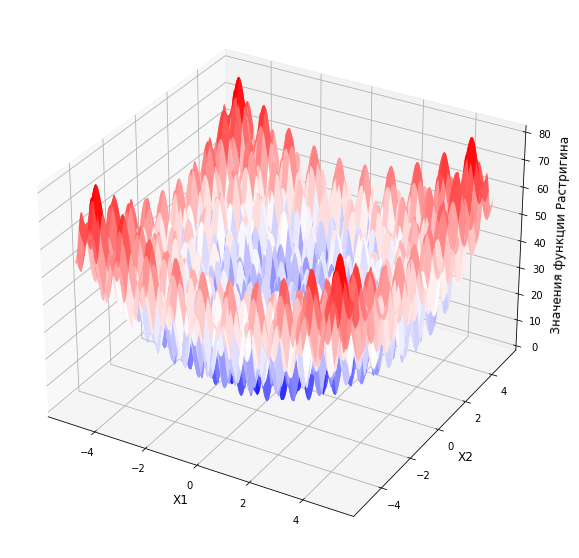

In [3]:
# Координатная сетка для построения графика

# Пределы значений в каждой из размерностей и шаг
low_limit = -5.12
high_limit = 5.12
step = 0.01

# Координатная сетка для размерности d = 2
x1 = np.arange(low_limit, high_limit + step, step)
x2 = np.arange(low_limit, high_limit + step, step)
X1, X2 = np.meshgrid(x1, x2)

# Размеры поля графика
fig = plt.figure(figsize = (10, 10)) 
# Используем 3D-проекцию 
ax = fig.gca(projection = '3d')

# График функции
Z = rastrigin([X1, X2])
ax.plot_surface(X1, X2, Z, cmap = 'bwr')

# Подписи осей
ax.set_xlabel('X1', fontsize = 'large')
ax.set_ylabel('X2', fontsize = 'large')
ax.set_zlabel('Значения функции Растригина', fontsize = 'large')
plt.show()

#### Результат оптимизации для значений всех параметров по умолчанию

In [4]:
# Пределы (согласно Википедии, функция определена при х = (-5.12, 5.12))
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

In [5]:
res = differential_evolution(rastrigin, bounds, seed = 21)
print(f'Результат:\n{res.x}')
print(f'Количество итераций {res.nit}')
print(f'Количество вычислений {res.nfev}')

Результат:
[-1.38698965e-09  2.88488422e-09]
Количество итераций 69
Количество вычислений 2103


#### Параметр strategy

In [6]:
# Все значения параметра
strategy = [
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'rand2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand2bin',
    'rand1bin'
    ]

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра strategy
for current_strategy in strategy:
    res = differential_evolution(rastrigin, bounds, seed = 21, strategy = current_strategy)
    result[current_strategy] = res.nit

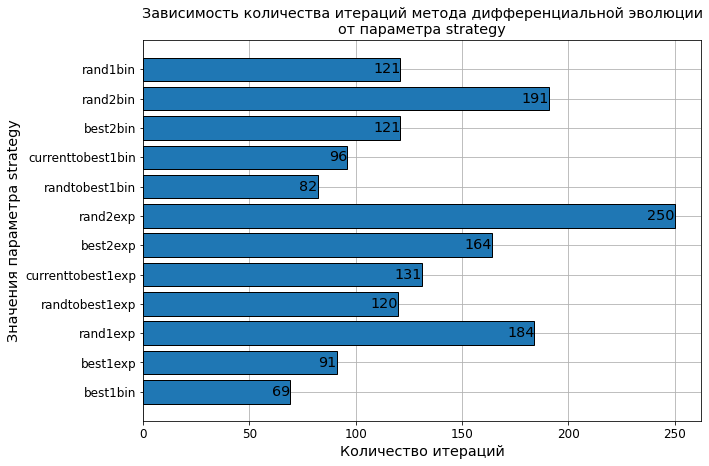

В данном эксперименте количество итераций минимально при strategy = best1bin, максимально при strategy = rand2exp.


In [7]:
# Строим график типа горизонтальная столбчатая диаграмма
plt.figure(figsize = (10, 7)) # Размеры поля графика
plt.barh(
    list(result.keys()), # Наименование столбцов (по оси Y)
    list(result.values()), # Значения (по оси X)
    edgecolor = 'black', # Чёрный контур столбцов, для красоты
    zorder = 2 # Столбцы поверх сетки
    )
# Выведем на график количество итераций
for current_strategy in result.keys():
    plt.text(result[current_strategy], # Позиция по оси X - конец столбца
             current_strategy, # Позиция по оси Y - текущий столбец
             s = result[current_strategy], # Выводим количество итераций
             fontsize = 'x-large', # Размер шрифта
             verticalalignment = 'center', # Вертикальное выравнивание - по центру
             horizontalalignment = 'right' # Горизонтальное выравнивание - по правому краю
            )
# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра strategy', fontsize = 'x-large')
plt.xlabel('Количество итераций', fontsize = 'x-large')
plt.ylabel('Значения параметра strategy', fontsize = 'x-large')

plt.show()

print(f'В данном эксперименте количество итераций минимально при strategy = {min(result, key = result.get)}, максимально при strategy = {max(result, key = result.get)}.')

#### Параметр popsize

In [8]:
# Параметр целочисленный, возмём от 1 до 50
popsize = range(1, 51)

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра popsize
for current_popsize in popsize:
    res = differential_evolution(rastrigin, bounds, seed = 21, popsize = current_popsize)
    result[current_popsize] = res.nit

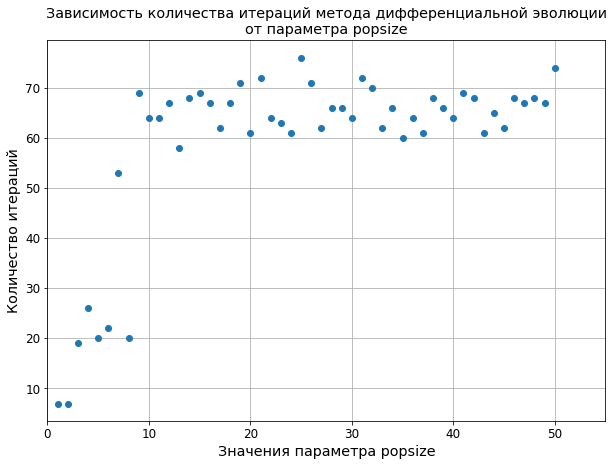

В данном эксперименте количество итераций увеличивается с возрастанием значения параметра popsize от 1 до 10,
данее количество итераций практически не зависит от значений параметра popsize.


In [9]:
# Строим точечный график
plt.figure(figsize = (10, 7)) # Размеры поля графика
plt.scatter(
    result.keys(), # Значения параметра popsize (по оси X)
    result.values(), # Количество итераций (по оси Y)
    zorder = 2
    )

# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра popsize', fontsize = 'x-large')
plt.xlabel('Значения параметра popsize', fontsize = 'x-large')
plt.ylabel('Количество итераций', fontsize = 'x-large')
plt.xlim(0, max(result) + 5)

plt.show()

print(f'В данном эксперименте количество итераций увеличивается с возрастанием значения параметра popsize от 1 до 10,')
print('данее количество итераций практически не зависит от значений параметра popsize.')

#### Параметр tol

In [10]:
# Параметр возмём от 1e-2 до 1e-9
tol = [1 * 10 ** -x for x in range(2, 10)]

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра tol
for current_tol in tol:
    res = differential_evolution(rastrigin, bounds, seed = 21, tol = current_tol)
    result[current_tol] = res.nit

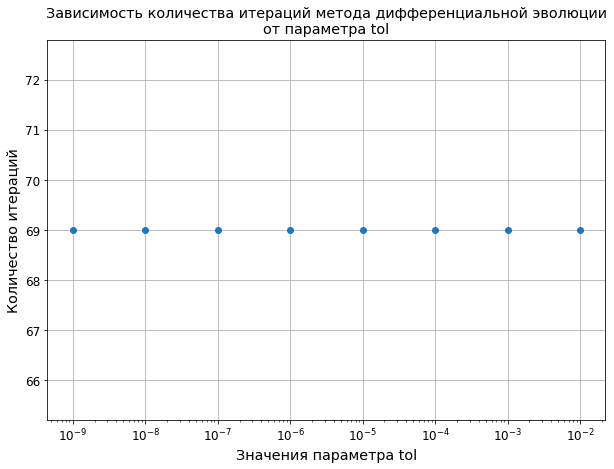

В данном эксперименте количество итераций не зависит от значения параметра tol.


In [11]:
# Строим точечный график
plt.figure(figsize = (10, 7)) # Размеры поля графика
plt.scatter(
    result.keys(), # Значения параметра tol (по оси X)
    result.values(), # Количество итераций (по оси Y) 
    zorder = 2
    )

# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра tol', fontsize = 'x-large')
plt.xlabel('Значения параметра tol', fontsize = 'x-large')
plt.ylabel('Количество итераций', fontsize = 'x-large')
plt.semilogx()

plt.show()

print(f'В данном эксперименте количество итераций не зависит от значения параметра tol.')

#### Параметр mutation

In [12]:
# Параметр возмём от 0 до 2
mutation = np.arange(0, 2, 0.05)

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра mutation
for current_mutation in mutation:
    res = differential_evolution(rastrigin, bounds, seed = 21, mutation = current_mutation)
    result[current_mutation] = res.nit

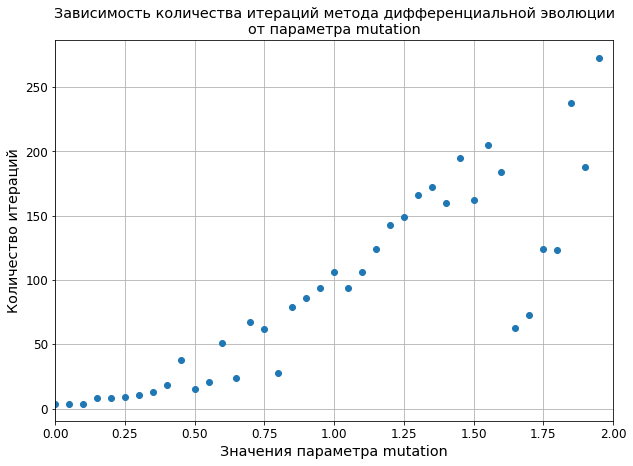

В данном эксперименте количество итераций возрастает с увеличением значения параметра mutation.
На графике наблюдаются относительно большие отклонения количества итераций в сторону меньших значений.


In [13]:
# Строим точечный график
plt.figure(figsize = (10, 7)) # Размеры поля графика
plt.scatter(
    result.keys(), # Значения параметра mutation (по оси X)
    result.values(), # Количество итераций (по оси Y) 
    zorder = 2
    )

# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра mutation', fontsize = 'x-large')
plt.xlabel('Значения параметра mutation', fontsize = 'x-large')
plt.ylabel('Количество итераций', fontsize = 'x-large')
plt.xlim(0, 2)

plt.show()

print(f'В данном эксперименте количество итераций возрастает с увеличением значения параметра mutation.')
print(f'На графике наблюдаются относительно большие отклонения количества итераций в сторону меньших значений.')

#### Параметр recombination

In [14]:
# Параметр возмём от 0 до 1
recombination = np.arange(0, 1, 0.025)

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра recombination
for current_recombination in recombination:
    res = differential_evolution(rastrigin, bounds, seed = 21, recombination = current_recombination)
    result[current_recombination] = res.nit

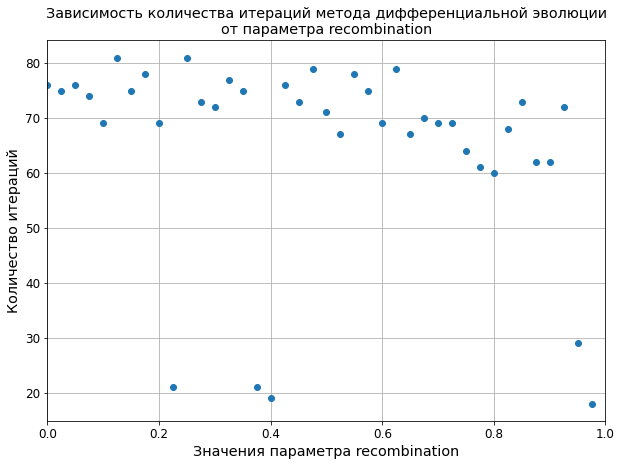

В данном эксперименте количество итераций практически не зависит от значения параметра recombination.
На графике наблюдаются отдельные относительно большие отклонения количества итераций в сторону меньших значений.


In [15]:
# Строим точечный график
plt.figure(figsize = (10, 7)) # Размеры поля графика
plt.scatter(
    result.keys(), # Значения параметра recombination (по оси X)
    result.values(), # Количество итераций (по оси Y) 
    zorder = 2
    )

# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра recombination', fontsize = 'x-large')
plt.xlabel('Значения параметра recombination', fontsize = 'x-large')
plt.ylabel('Количество итераций', fontsize = 'x-large')
plt.xlim(0, 1)

plt.show()

print(f'В данном эксперименте количество итераций практически не зависит от значения параметра recombination.')
print(f'На графике наблюдаются отдельные относительно большие отклонения количества итераций в сторону меньших значений.')

#### Параметр updating

In [16]:
# Все значения параметра
updating = ['immediate', 'deferred']

# Словарь с результатами расчётов
result = {}

# Перебираем все значения параметра updating
for current_updating in updating:
    res = differential_evolution(rastrigin, bounds, seed = 21, updating = current_updating)
    result[current_updating] = res.nit

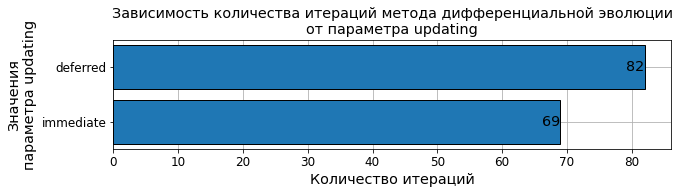

В данном эксперименте количество итераций максимально для updating = deferred и минимально для updating = immediate


In [17]:
# Строим график типа горизонтальная столбчатая диаграмма
plt.figure(figsize = (10, 2)) # Размеры поля графика
plt.barh(
    list(result.keys()), # Наименование столбцов (по оси Y)
    list(result.values()), # Значения (по оси X)
    edgecolor = 'black', 
    zorder = 2 
    )
# Выведем на график количество итераций
for current_updating in result.keys():
    plt.text(result[current_updating], # Позиция по оси X - конец столбца
             current_updating, # Позиция по оси Y - текущий столбец
             s = result[current_updating], # Выводим количество итераций
             fontsize = 'x-large', # Размер шрифта
             verticalalignment = 'center', # Вертикальное выравнивание - по центру
             horizontalalignment = 'right' # Горизонтальное выравнивание - по правому краю
            )
# Оформление графика
plt.grid() # Основная сетка
plt.tick_params(labelsize = 'large') # Размер шрифта делений по осям
plt.title('Зависимость количества итераций метода дифференциальной эволюции\nот параметра updating', fontsize = 'x-large')
plt.xlabel('Количество итераций', fontsize = 'x-large')
plt.ylabel('Значения\nпараметра updating', fontsize = 'x-large')

plt.show()

print(f'В данном эксперименте количество итераций максимально для updating = deferred и минимально для updating = immediate')